# 🎨 Visualización de Datos (Business Insights)

## 🎯 Objetivo
Transformar los datos procesados en **inteligencia visual**. En esta fase, utilizamos gráficos avanzados para responder preguntas de negocio y detectar patrones que los números crudos no muestran.

## ⚙️ Innovación Técnica
* **Modularidad:** Utilizamos nuestra propia librería personalizada `src/sp_vis.py` para garantizar un diseño corporativo y código limpio.
* **Feature Engineering:** Generamos automáticamente variables temporales (meses) al vuelo para analizar la estacionalidad.

## 📊 Estructura del Análisis
Hemos dividido la visualización en 4 bloques estratégicos:

### 1. 🎯 Análisis del Resultado (KPIs)
* **Donut Chart:** Visualización clara de la tasa de conversión (Éxito vs Fracaso).

### 2. 💰 Análisis Económico
* **Boxplot (Ingresos):** ¿Tienen más dinero los clientes que aceptan el depósito?
* **Heatmap (Correlaciones):** Mapa de calor estratégico para ver cómo influye el **Euribor** y otras variables numéricas en la venta.

### 3. 👥 Perfil del Cliente (Buyer Persona)
* **Demografía (Edad):** Histograma para detectar si vendemos más a jóvenes o jubilados.
* **Laboral (Job):** ¿Qué profesiones son más rentables?
* **Cultural (Education):** Impacto del nivel de estudios en la decisión.

### 4. 📅 Estacionalidad (El Momento)
* **Bar Chart (Meses):** Identificación de los meses con mayor volumen de llamadas vs. mayor tasa de éxito.

# 📊 GENERACIÓN DE LA GALERÍA DE GRÁFICOS

In [1]:
# -------------------------------------------------------------------------
# EJECUCIÓN DE VISUALIZACIÓN (Notebook: 07_visualizacion_datos.ipynb)
# -------------------------------------------------------------------------
import sys
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración de rutas para importar nuestra librería 'src'
#    Esto permite que Python encuentre el archivo sp_vis.py en la carpeta de al lado
sys.path.append('../') 
from src import sp_vis as sv 

# 2. Cargar Datos Maestros
#    Cargamos el CSV limpio que generamos en el paso anterior
df = pd.read_csv('../data/procesados/datos_finales_analisis.csv')

# 3. Configurar Estilo Visual
#    Llamamos a la función que pone las letras grandes y el fondo bonito
sv.configurar_estilo()

# -------------------------------------------------------------------------
# 🛠️ CORRECCIÓN DE DATOS (Feature Engineering al vuelo)
# -------------------------------------------------------------------------
# Como la columna 'month' no existe en el CSV original, la creamos aquí
# usando la columna 'date'.
if 'month' not in df.columns:
    print("⚙️ Generando columna 'month' a partir de las fechas...")
    df['date'] = pd.to_datetime(df['date']) # Convertimos a fecha real
    df['month'] = df['date'].dt.strftime('%b').str.lower() # Extraemos 'may', 'jun'...
    print("✅ Columna 'month' creada con éxito.")
else:
    print("✅ La columna 'month' ya existía.")

🎨 Estilo visual configurado correctamente.
⚙️ Generando columna 'month' a partir de las fechas...
✅ Columna 'month' creada con éxito.


## 1. Análisis del Objetivo (Target)


--- 1. ANÁLISIS DEL TARGET (¿Cuánto vendemos?) ---


c:\Users\usuario\Desktop\Proyecto_Banco_EDA\notebooks\..\src\sp_vis.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f"No ({conteo[0]})", f"Sí ({conteo[1]})"]


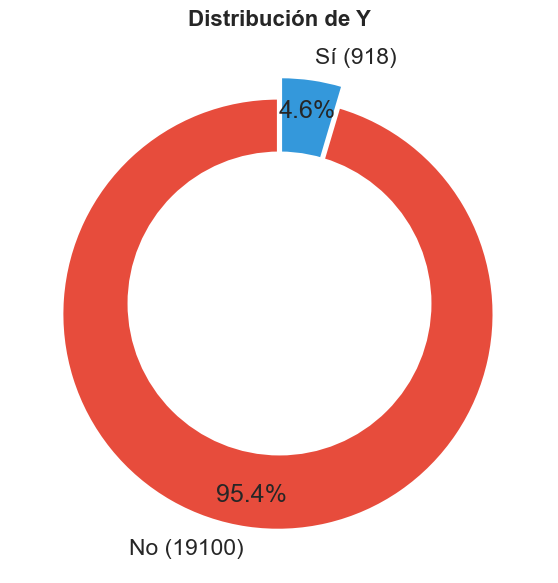

In [2]:
# --- SECCIÓN 1: EL RESULTADO ---
print("\n--- 1. ANÁLISIS DEL TARGET (¿Cuánto vendemos?) ---")
sv.plot_target_donut(df, col_target='y')

> **💡 Insight del Objetivo (El Desafío del 4.6%):**
> * **Realidad Cruda:** El dataset presenta un **desbalanceo extremo**. De las más de 20.000 llamadas analizadas, solo el **4.6%** (918 clientes) terminaron en venta.


## 2. Análisis Económico


--- 2. ANÁLISIS ECONÓMICO (Ingresos) ---


c:\Users\usuario\Desktop\Proyecto_Banco_EDA\notebooks\..\src\sp_vis.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col_x, y=col_y, data=df, palette=COLORES_PRO, width=0.5, linewidth=1.5)


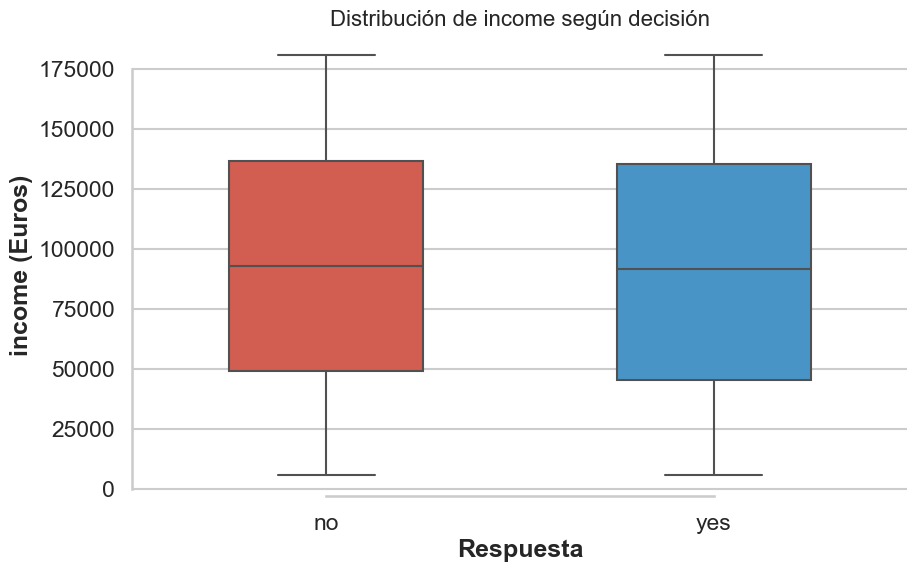


--- 3. FACTORES DE VENTA (Mapa de Calor) ---


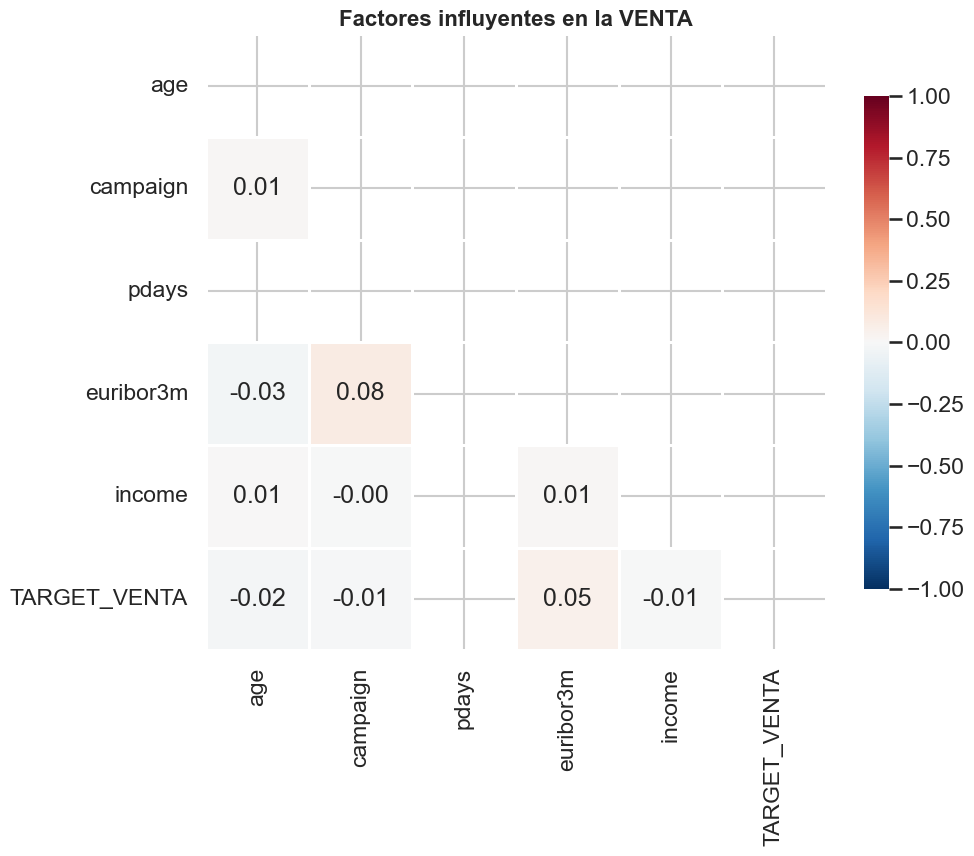

In [3]:
# --- SECCIÓN 2: EL DINERO Y LA ECONOMÍA ---

print("\n--- 2. ANÁLISIS ECONÓMICO (Ingresos) ---")
sv.plot_ingresos_vs_target(df, col_x='y', col_y='income')

print("\n--- 3. FACTORES DE VENTA (Mapa de Calor) ---")
# Aquí vemos qué variables matemáticas influyen más (Euribor, etc.)
sv.plot_heatmap_estrategico(df)

> **💡 Insight Económico (La Independencia del Dinero):**
> * **Ingresos (Income):** El Boxplot revela una **igualdad total**. La distribución de ingresos es idéntica entre quienes compran y quienes no. Esto indica que el poder adquisitivo del cliente es irrelevante para este producto específico.
> * **Correlaciones (Heatmap):**
>     * Observamos una **desconexión general**. Ninguna variable numérica tiene una correlación fuerte con la venta (`TARGET_VENTA`).
>     * El **Euribor (`euribor3m`)** muestra una relación extremadamente débil (0.05), lo que sugiere que el entorno macroeconómico no está dictando el éxito de esta campaña tanto como factores cualitativos (el perfil del cliente o el argumento de venta).

## 3. Perfil del Cliente


--- 4. PERFIL DEMOGRÁFICO (Edad) ---


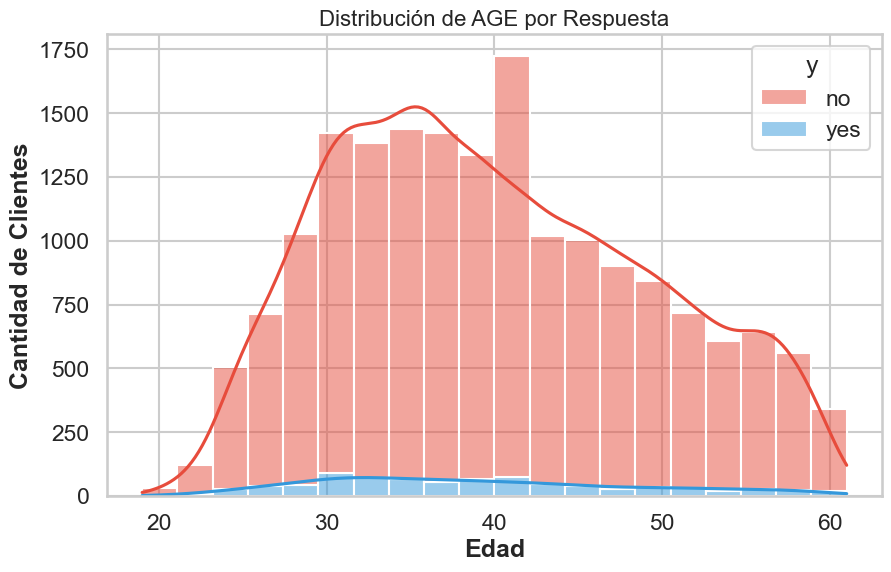

In [4]:
# --- SECCIÓN 3: PERFIL DEL CLIENTE ---
print("\n--- 4. PERFIL DEMOGRÁFICO (Edad) ---")
sv.plot_edad_distribucion(df, col_x='age')

> **💡 Insight Demográfico:**
> * **Volumen Masivo:** La campaña ataca agresivamente al segmento de **30 a 50 años** (la gran montaña central). Sin embargo, la conversión en este grupo es bajísima (visualmente casi todo es rojo).
> * **Nichos de Oro:** Se observa una mayor densidad de color azul (éxito) en los extremos:
>     1. **Jóvenes (< 25 años):** Probablemente estudiantes sin cargas financieras.
>     2. **Seniors (> 60 años):** Jubilados con capital ahorrado y aversión al riesgo (buscan depósitos seguros).
> * **Conclusión:** Aunque el banco se esfuerza en la población activa media, el producto encaja mucho mejor, proporcionalmente, fuera de ese rango.


--- 5. PERFIL LABORAL (Trabajo) ---


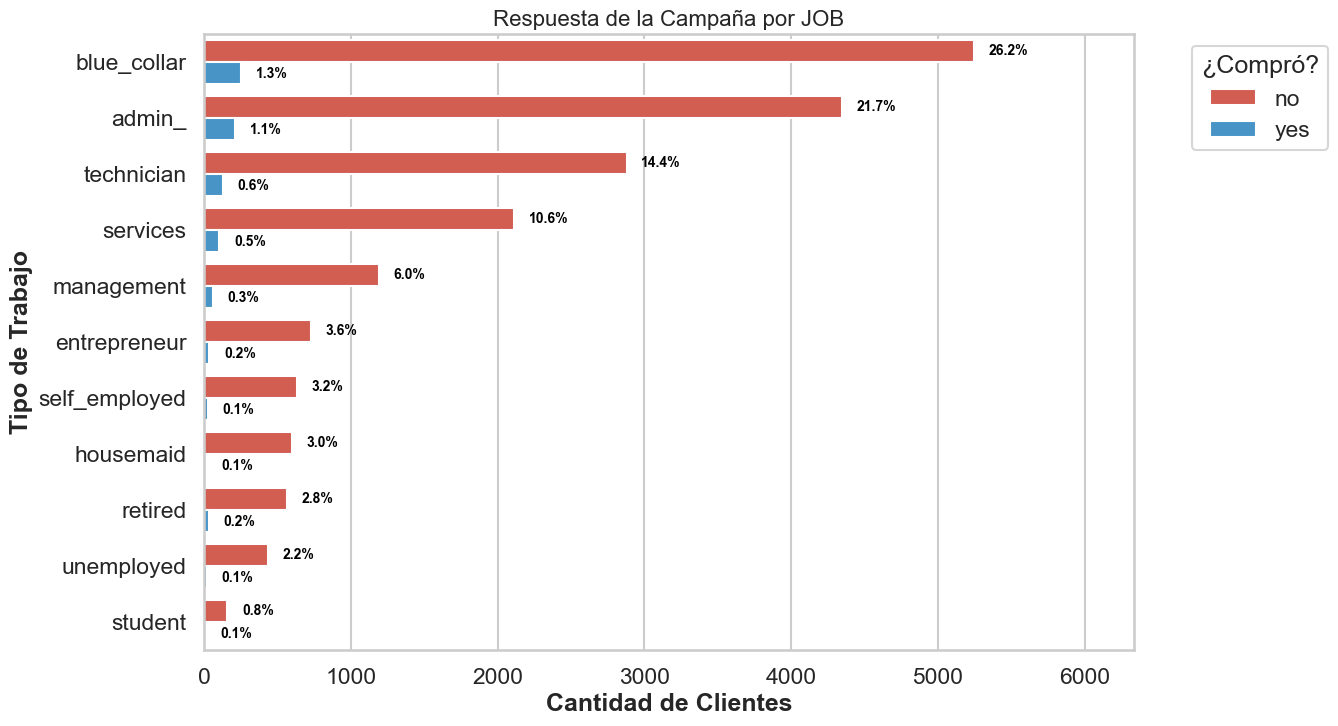

In [5]:
print("\n--- 5. PERFIL LABORAL (Trabajo) ---")
sv.plot_trabajo_barras(df, col_cat='job')

> **💡 Insight Laboral (Calidad vs Cantidad):**
> * **Volumen:** La inmensa mayoría de llamadas se dirigen a `blue-collar` (obreros), `admin.` y `technician`.
> * **Eficiencia Oculta:** Aunque sus barras son pequeñas, los **estudiantes (`student`)** presentan la mejor ratio de conversión (aprox. **11%** de éxito), seguidos de los jubilados. `blue-collar` (tasa de éxito < 5%).


--- 6. PERFIL CULTURAL (Educación) ---


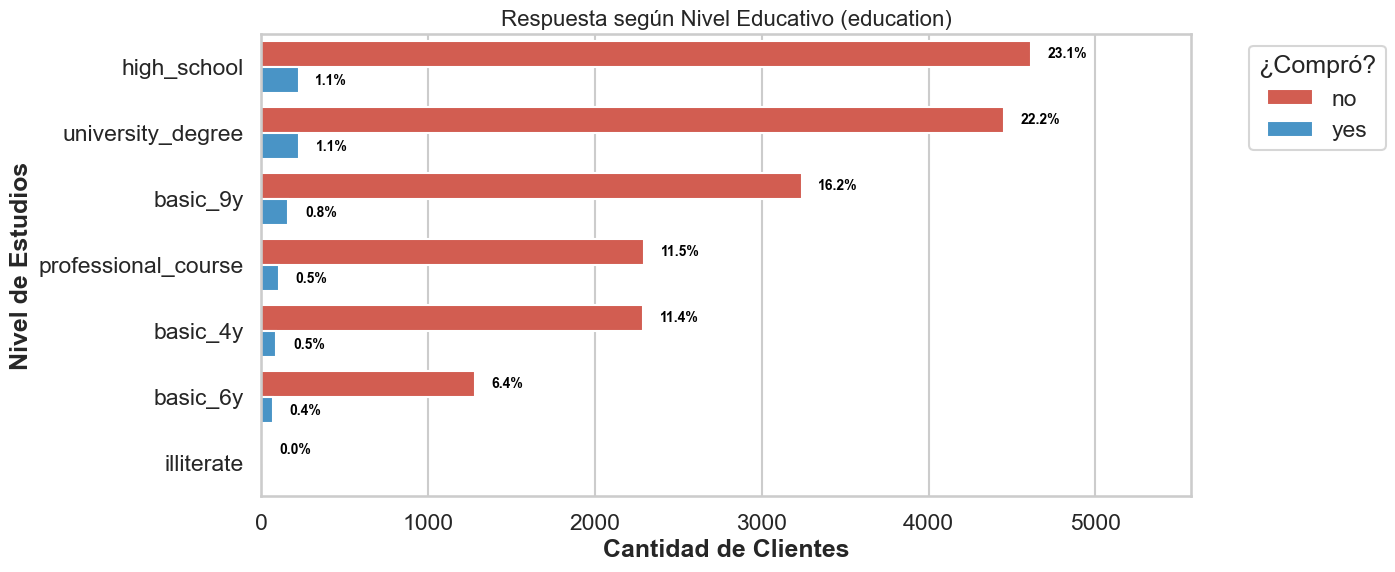

In [6]:
print("\n--- 6. PERFIL CULTURAL (Educación) ---")
sv.plot_educacion_barras(df, col_cat='education')

> **💡 Insight Cultural:**
> * Los perfiles de **secundaria (`high_school`)** y **universitarios (`university_degree`)** tienen un comportamiento casi idéntico en términos de conversión relativa.
> * Esto sugiere que el producto es lo suficientemente genérico para atraer a ambos grupos por igual, o que la estrategia de venta no se está adaptando al nivel cultural del cliente.

## 4. Estacionalidad (El Momento)


--- 7. ESTACIONALIDAD (Mejores Meses) ---


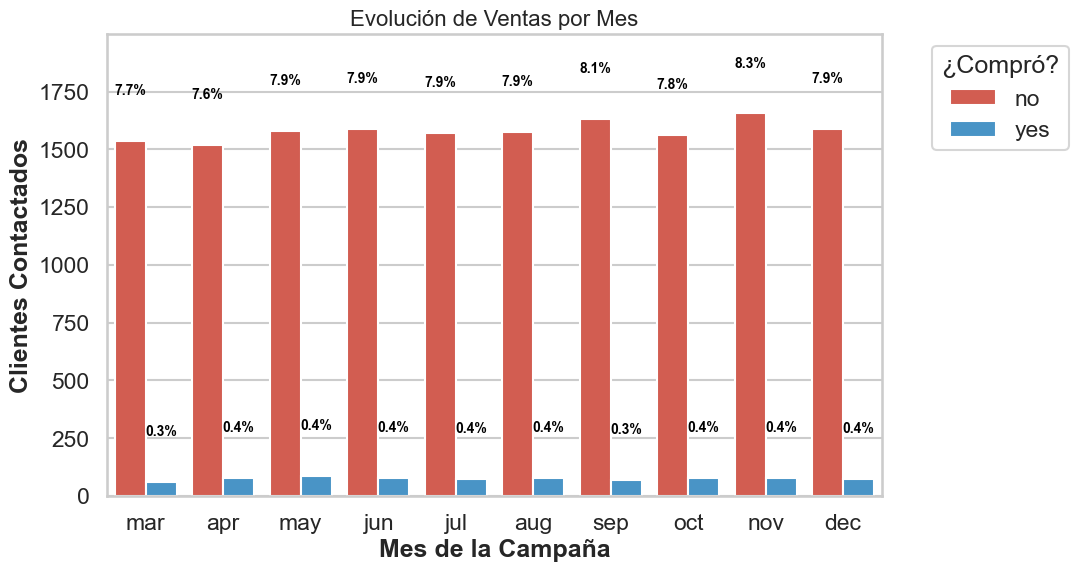

In [7]:
# --- SECCIÓN 4: EL MOMENTO ---
print("\n--- 7. ESTACIONALIDAD (Mejores Meses) ---")
# Gracias a la corrección de arriba, este gráfico ya no dará error
sv.plot_mes_barras(df, col_cat='month')

> **💡 Insight de Estacionalidad (Sorpresa):**
> * **Estrategia Plana:** A diferencia de lo habitual, esta campaña no tiene picos estacionales. Se ha contactado prácticamente al mismo volumen de clientes (aprox. **1600 llamadas/mes**) de manera constante durante todo el año.
> * **Resultado Uniforme:** La tasa de éxito es invariablemente baja (0.3% - 0.4% del total por mes).
> * **Conclusión:** El "mes" **no parece ser una variable discriminante** en este caso específico, ya que el comportamiento es idéntico sea marzo o diciembre.